In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from IPython.display import display

plt.style.use('ggplot')

# Ejercicio 1
movies = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
movies['releaseDate'] = pd.to_datetime(movies['releaseDate'])

C:\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Pregunta 3
# Variables continuas

--------- budget ---------
Kurtosis: 10.9734218575723 Skewness: 3.0675409868232766 

--------- revenue ---------
Kurtosis: 22.147591169997828 Skewness: 4.24691481171282 

--------- runtime ---------
Kurtosis: 4.511985050736557 Skewness: -0.5955947332413063 

--------- popularity ---------
Kurtosis: 45.62062315690318 Skewness: 5.8785554484273685 

--------- voteAvg ---------
Kurtosis: 1.485722857890229 Skewness: -0.577713185870908 

--------- voteCount ---------
Kurtosis: 16.454413252515597 Skewness: 3.6638581185954884 

--------- genresAmount ---------
Kurtosis: 0.3818570636520362 Skewness: 0.5493382964041084 

--------- productionCoAmount ---------
Kurtosis: 8.42683694612242 Skewness: 2.196195864423918 

--------- productionCountriesAmount ---------
Kurtosis: 36.52856507184075 Skewness: 5.378047230920894 

--------- actorsAmount ---------
Kurtosis: 6.756941687787094 Skewness: 2.051516614047091 

--------- actorsPopularity ---------
Kurtosis: 7.055357408238592 Skewness: 2.3471281204430

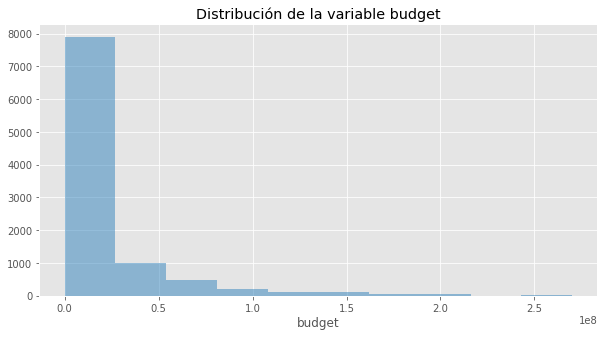

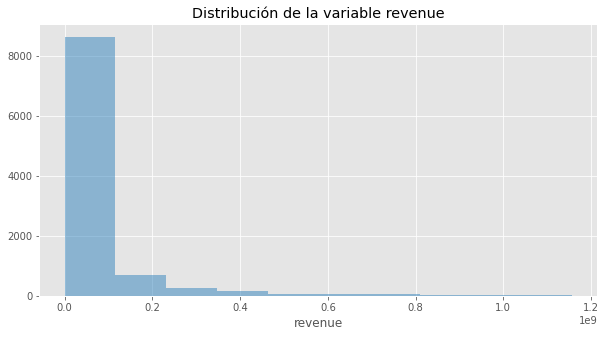

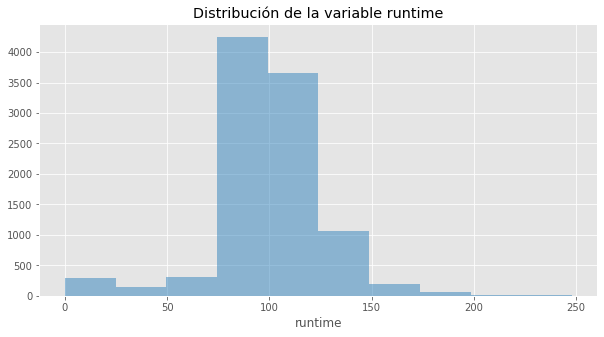

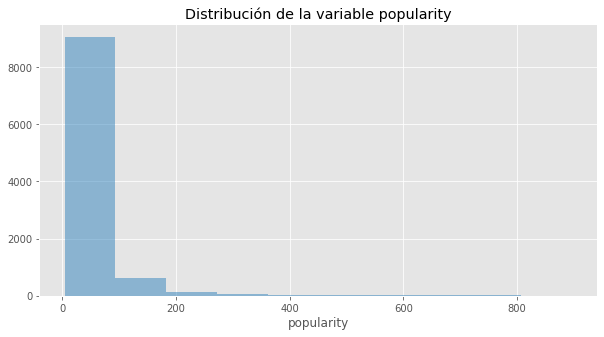

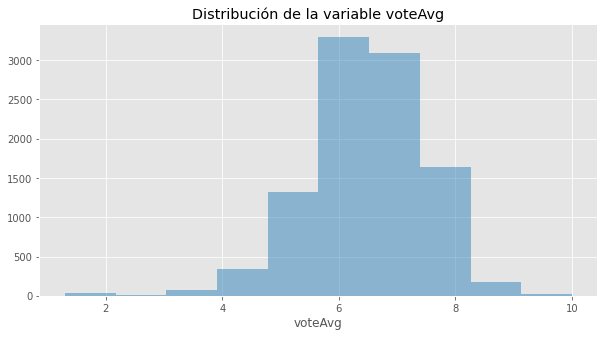

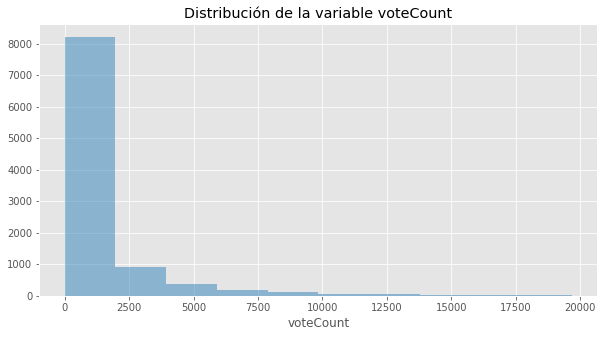

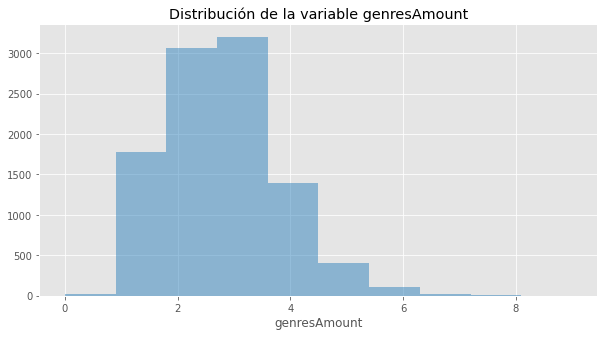

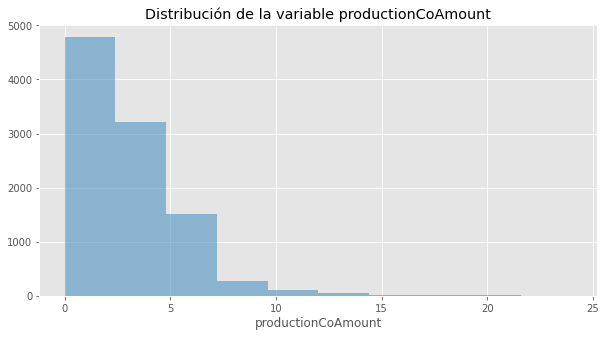

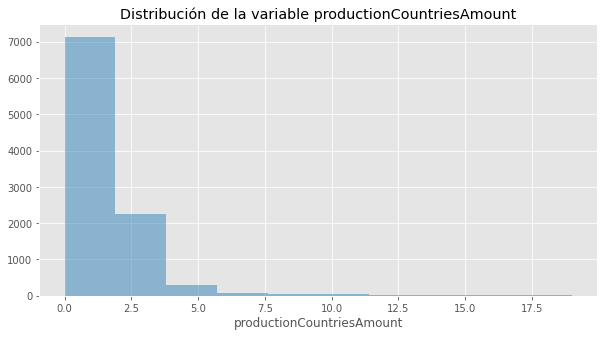

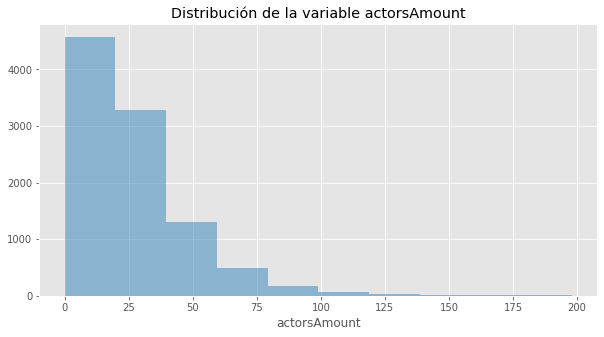

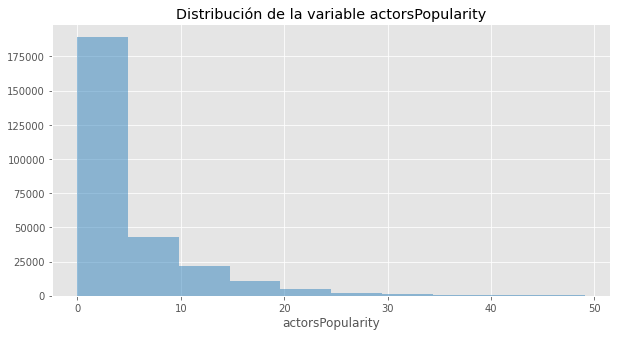

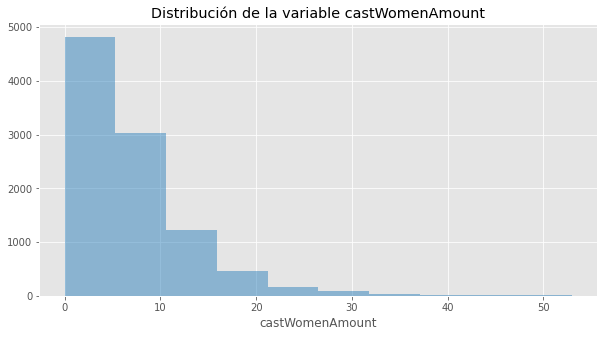

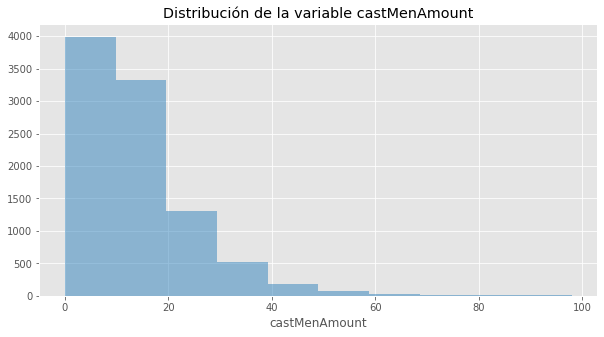

In [2]:
variables = list(movies.describe().columns[1:])
variables.append('actorsPopularity')
variables.append('castWomenAmount')
variables.append('castMenAmount')

for variable in variables:
  data = movies[variable].dropna()

  if variable == 'budget':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 300000000).dropna()

  if variable == 'revenue':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 1200000000).dropna()

  if variable == 'runtime':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 300).dropna()

  if variable == 'popularity':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 900).dropna()

  if variable == 'voteCount':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 20000).dropna()
  
  if variable == 'genresAmount':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 10).dropna()
  
  if variable == 'productionCoAmount':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 25).dropna()

  if variable == 'productionCountriesAmount':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 20).dropna()
  
  if variable == 'actorsAmount':
    data = pd.Series(data, dtype=float)
    data = data.where(data < 200).dropna()

  if variable == 'actorsPopularity':
    numbers = []
    for row in data:
      for data in row.split('|'):
        try: numbers.append(float(data))
        except: pass
    data = pd.Series(numbers, dtype=float)
    data = data.where(data < 50).dropna()

  if (variable == 'castWomenAmount' or variable == 'castMenAmount'):
    data = data.replace('[^0-9]', np.NaN, regex=True).dropna()
    data = pd.Series(np.array(data, dtype=int))
    asintota = 55 if variable == 'castWomenAmount' else 100
    data = data.where(data < asintota).dropna()
  
  mu, sigma = stats.norm.fit(data)

  # Valores teóricos de la normal en el rango observado
  x_hat = np.linspace(min(data), max(data), num=100)
  y_hat = stats.norm.pdf(x_hat, mu, sigma)
  
  # Gráfico
  fig, ax = plt.subplots(figsize=(10,5))
  ax.hist(x=data, color="#3182bd", alpha=0.5)
  ax.set_title('Distribución de la variable %s' %(variable))
  ax.set_xlabel(variable)

  # Mostrando normalidad
  print('---'*3, variable, '---'*3)
  print('Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')


# Variables discretas

In [42]:
discrete_var = []
for column in movies.columns:
  if column == 'id': continue
  if column not in variables: discrete_var.append(column)

needs_split = ['genres', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'director', 'actors', 'actorsCharacter']
print(len(discrete_var))
# discrete_var = discrete_var[0:2]
for variable in discrete_var:
  data = movies[variable]

  if variable in needs_split:
    genres = []
    for genre in data:
      try: 
        for gen_sep in genre.split('|'):
          genres.append(gen_sep)        
      except: pass 
    data = pd.Series(genres)
  data = data.value_counts()
  print('-'*30)
  print(variable)
  display(data)
  print('-'*30)


13
------------------------------
genres


Drama              3789
Comedy             3018
Action             2632
Thriller           2565
Adventure          1769
Horror             1512
Animation          1460
Romance            1428
Family             1407
Fantasy            1284
Science Fiction    1267
Crime              1225
Mystery             804
History             406
Music               315
Documentary         299
TV Movie            276
War                 275
Western             120
dtype: int64

------------------------------
------------------------------
homePage


http://www.naruto-movie.com/                          6
http://www.thehungergames.movie/                      4
http://www.p3m.jp/                                    3
http://www.kungfupanda.com/                           3
http://kizumonogatari-usa.com/                        3
                                                     ..
http://www.lemonademouth.com                          1
http://warnervideo.com/greenlanternemeraldknights/    1
http://www.loversguide.com/                           1
http://dragontattoo.com/                              1
https://www.netflix.com/title/81425229                1
Name: homePage, Length: 4125, dtype: int64

------------------------------
------------------------------
productionCompany


Warner Bros. Pictures    480
Universal Pictures       466
Columbia Pictures        347
Paramount                320
20th Century Fox         310
                        ... 
Production Group           1
C.R.C.                     1
Cardinal Pictures          1
Artisti Associati          1
Elefantec Global           1
Length: 10142, dtype: int64

------------------------------
------------------------------
productionCompanyCountry


US    12675
       7735
JP     1604
FR     1478
GB     1413
      ...  
SK        1
XC        1
PY        1
SI        1
EC        1
Length: 86, dtype: int64

------------------------------
------------------------------
productionCountry


United States of America    6788
United Kingdom              1171
Japan                        731
France                       668
Canada                       634
                            ... 
Tunisia                        1
Libyan Arab Jamahiriya         1
Kuwait                         1
Vietnam                        1
Slovakia                       1
Length: 111, dtype: int64

------------------------------
------------------------------
video


False    9430
True       84
Name: video, dtype: int64

------------------------------
------------------------------
director


Steven Spielberg         30
Clint Eastwood           28
Ridley Scott             23
Sam Liu                  22
Robert Rodriguez         21
                         ..
Selena Quintanilla        1
Marco Polo Constandse     1
Jeremy Garelick           1
Leon Gast                 1
Alexandr Babaev           1
Length: 6008, dtype: int64

------------------------------
------------------------------
actors


FALSE                  480
Frank Welker           143
Grey DeLisle            97
Jeff Bennett            91
Fred Tatasciore         86
                      ... 
Lev Polyakov             1
Apollon Yachnitskiy      1
Nikolay Trofimov         1
Roman Filippov           1
Nedu Wazobia             1
Length: 132626, dtype: int64

------------------------------
------------------------------
actorsCharacter


                                  4474
Self                              1723
Additional Voices (voice)         1566
Himself                           1445
Dancer                            1008
                                  ... 
Ollivander                           1
Alastor 'Mad-Eye' Moody              1
Big Lycan / Creature Performer       1
Kosta                                1
922162                               1
Length: 164023, dtype: int64

------------------------------
------------------------------
originalTitle


Pinocchio                                                4
Great Expectations                                       3
Escape Room                                              3
The Courier                                              3
Alice in Wonderland                                      3
                                                        ..
Into the Sun                                             1
The Land Before Time X: The Great Longneck Migration     1
The Land Before Time XI: Invasion of the Tinysauruses    1
Dug's Special Mission                                    1
Row 19                                                   1
Name: originalTitle, Length: 9760, dtype: int64

------------------------------
------------------------------
title


Pinocchio        4
Cinderella       4
Carrie           3
The Courier      3
Awake            3
                ..
Blind Horizon    1
Chasing Papi     1
The Eye 2        1
An Education     1
Row 19           1
Name: title, Length: 9697, dtype: int64

------------------------------
------------------------------
originalLanguage


en    7772
ja     644
es     425
fr     271
ko     167
zh     119
it     100
de      84
cn      80
ru      67
pt      43
no      28
sv      27
hi      27
da      27
nl      18
th      17
pl      15
id      12
tr      10
fi       8
tl       5
te       5
sr       4
is       4
fa       3
ro       2
cs       2
el       2
uk       2
ms       1
ml       1
ta       1
la       1
he       1
ar       1
eu       1
bn       1
nb       1
ca       1
Name: originalLanguage, dtype: int64

------------------------------
------------------------------
releaseDate


2021-10-08    15
2021-02-12    15
2021-10-01    14
2021-11-12    12
2019-11-08    11
              ..
2006-10-21     1
1948-05-27     1
1998-08-04     1
2008-08-29     1
2021-10-31     1
Name: releaseDate, Length: 5568, dtype: int64

------------------------------


# Ejercicio 4.3

In [4]:
movies_votes = movies.sort_values(['voteCount'], ascending=False).loc[:, ['title', 'voteCount']]
movies_votes

,title,voteCount
3511,Inception,30788
5027,Interstellar,27644
87,The Dark Knight,26690
3397,The Avengers,26215
5889,Deadpool,26178
...,...,...
9925,Kimetsu Orchestra Concert,1
9185,Faster Than Light: the Dream of Interstellar F...,1
9767,El sexo me da risa 8,1
7613,Sing Along,1


# Ejercicio 4.6

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

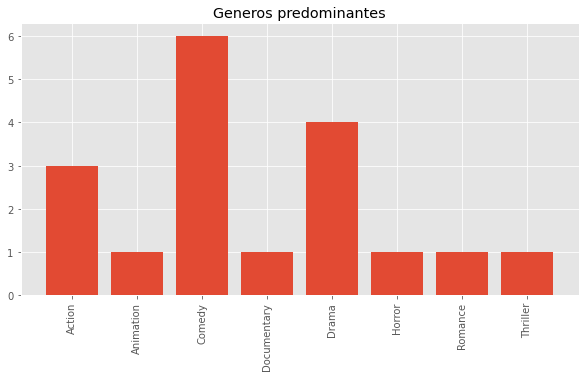

In [5]:
temp = movies.sort_values(['releaseDate'], ascending=False).loc[:, ['genres', 'releaseDate']]
splited_genres = []
for genre in list(temp['genres']): splited_genres.append(str(genre).split('|')[0])
movies_genres = pd.DataFrame({ 'genres': splited_genres }).head(20)

# Contando los generos
genres_count = movies_genres.groupby('genres').value_counts()

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Generos predominantes')
ax.bar(list(genres_count.index[:-1]), list(genres_count.array[:-1]))
plt.xticks(rotation=90)


# Ejercicio 4.9

In [6]:
woman_tdata = list(movies['castWomenAmount'])
men_tdata = list(movies['castMenAmount'])
popularity_tdata = list(movies['popularity'])
revenue_tdata = list(movies['revenue'])

cast_pr = movies.loc[:, ['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']]

cast_women = []
cast_men = []
popularity = []
revenue = []

for i in range(len(woman_tdata)):
  try:
    wcount = int(woman_tdata[i])
    mcount = int(men_tdata[i])
    pop = popularity_tdata[i]
    reve = revenue_tdata[i]

    if (wcount > 10000 or mcount > 10000): continue

    # Se muestra
    cast_women.append(wcount)
    cast_men.append(mcount)
    popularity.append(pop)
    revenue.append(reve)
  except: pass

wm_pr = pd.DataFrame({ 'castWomen': cast_women, 'castMen': cast_men, 'popularity': popularity, 'revenue': revenue })
wm_pr.corr()

,castWomen,castMen,popularity,revenue
castWomen,1.000000,0.060654,0.040054,0.291642
castMen,0.060654,1.000000,0.000862,0.033637
popularity,0.040054,0.000862,1.000000,0.162866
revenue,0.291642,0.033637,0.162866,1.000000


# Ejercicio 4.12

<BarContainer object of 12 artists>

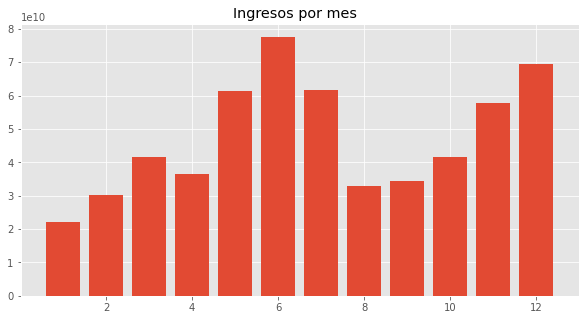

In [7]:
month = list(movies['releaseDate'].dt.month)
month_revenue = pd.DataFrame({ 'date': month, 'revenue': list(movies['revenue']) })
total_revenue = month_revenue.groupby(by='date').sum()

# Contando los generos
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Ingresos por mes  ')
ax.bar(list(total_revenue.index[:]), list(total_revenue['revenue'].array[:]))

# Ejercicio 4.15

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

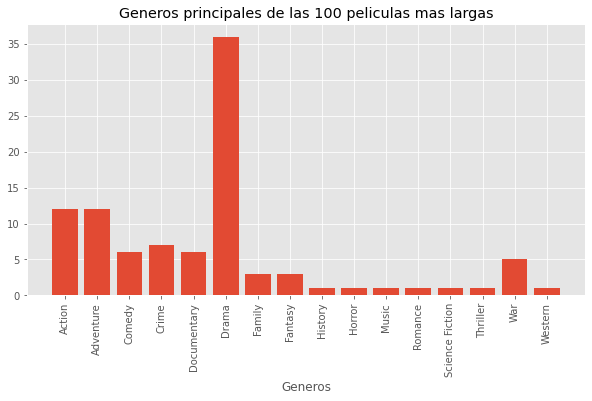

In [8]:
temp = movies.sort_values(['runtime'], ascending=False).loc[:, ['genres', 'runtime']].head(100)
splited_genres = []
for genre in list(temp['genres']): splited_genres.append(str(genre).split('|')[0])

movies_top_genres = pd.DataFrame({ 'genres': splited_genres })
top_genres = movies_top_genres.groupby('genres').value_counts()

# Gráfico
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Generos principales de las 100 peliculas mas largas')
ax.set_xlabel('Generos')
ax.bar(list(top_genres.index[:-1]), list(top_genres.array[:-1]))
plt.xticks(rotation=90)

# Ejercicio 5.1

<BarContainer object of 99 artists>

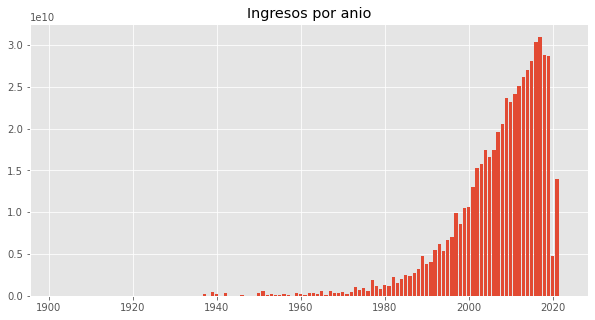

In [9]:
year = list(movies['releaseDate'].dt.year)
year_revenue = pd.DataFrame({ 'date': year, 'revenue': list(movies['revenue']) })
total_revenue = year_revenue.groupby(by='date').sum()

# Contando los generos
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Ingresos por anio')
ax.bar(list(total_revenue.index[:]), list(total_revenue['revenue'].array[:]))

# Ejercicio 5.2

60.701969208502085


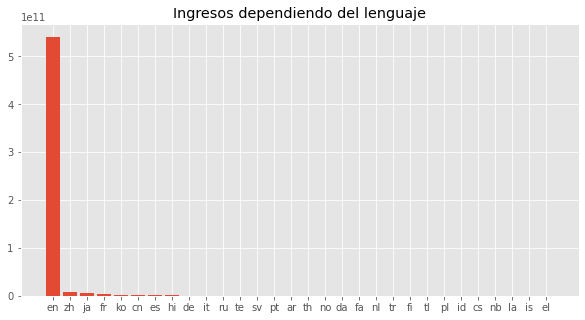

In [33]:
language_revenue = movies.loc[:, ['originalLanguage', 'revenue']]
revenue_per_language = language_revenue.groupby(by='originalLanguage').sum()
clean_revenue = revenue_per_language.loc[revenue_per_language['revenue'] > 0]
sorted_revenue = clean_revenue.sort_values(by='revenue', ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Ingresos dependiendo del lenguaje')
ax.bar(list(sorted_revenue.index[:]), list(sorted_revenue['revenue'].array[:]))

languages = language_revenue['originalLanguage']
count_language = languages.value_counts().head(10)
print(sorted_revenue['revenue'][0]/sorted_revenue['revenue'][1])